In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ApplyFishEye from fisheye

In [89]:
# 입력 이미지 파일 경로
input_image_path = "../data/train_source_image/TRAIN_SOURCE_0974.png"
# input_image_path = "../data/train_target_image/TRAIN_TARGET_0001.png"

mask_image_path = "../data/train_source_gt/TRAIN_SOURCE_0029.png"

palette = [[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156], [190, 153, 153], 
           [153, 153, 153], [250, 170, 30], [220, 220, 0], [107, 142, 35], [152, 251, 152], 
           [70, 130, 180], [220, 20, 60], [0, 0, 0]]

img = cv2.imread(input_image_path)
seg_map = cv2.imread(mask_image_path, 0)
seg_colored = np.zeros((seg_map.shape[0], seg_map.shape[1], 3), dtype=np.uint8)

for i, color in enumerate(palette):
    seg_colored[seg_map == i] = color

# seg_result = cv2.addWeighted(img, 0.7, seg_colored, 0.7, 0)

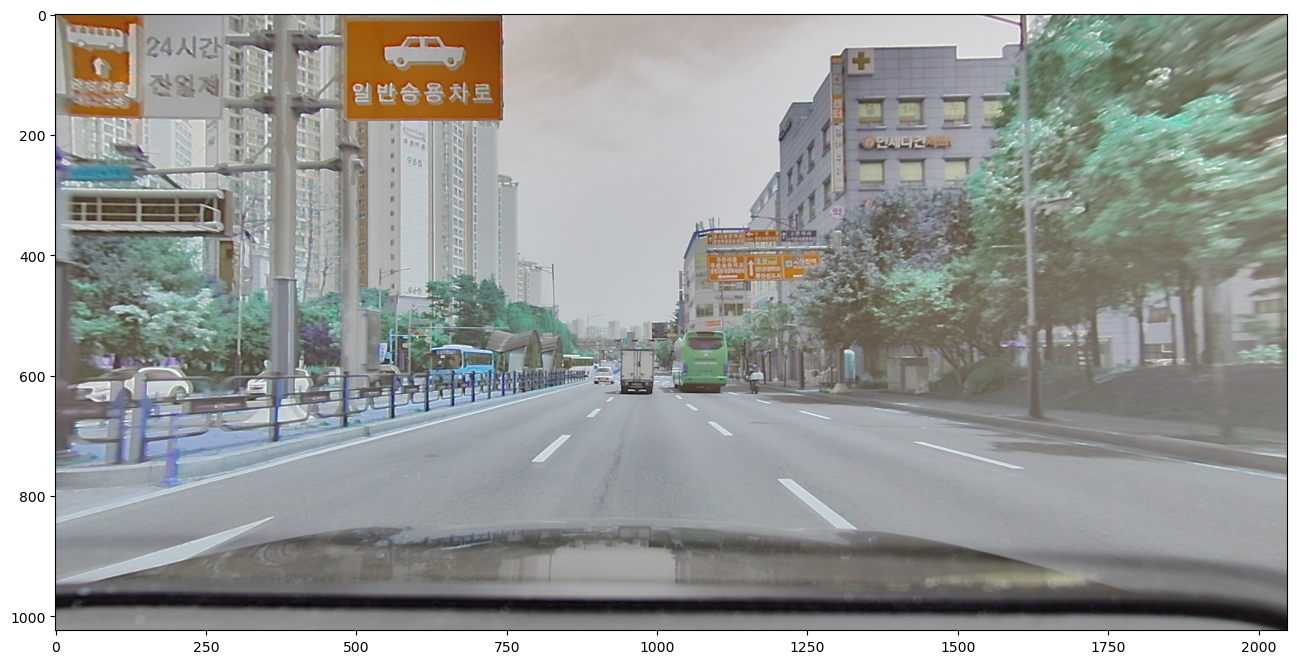

In [90]:
fig = plt.figure(figsize=(16,8))
plt.imshow(img)
plt.show()

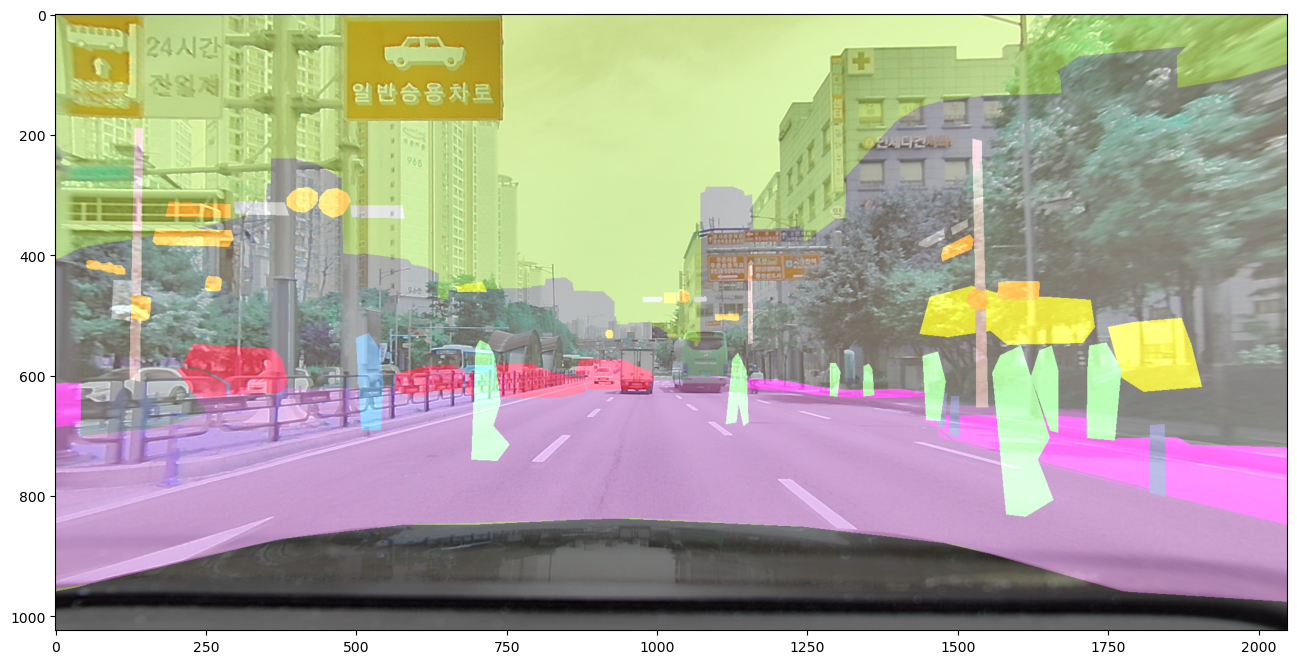

In [4]:
fig = plt.figure(figsize=(16,8))
plt.imshow(seg_result)
plt.show()

In [213]:
def apply_fisheye_distortion(image_path, mask=False):
    
    # 이미지 불러오기
    if mask==True:
        image = cv2.imread(image_path, 0)
    else:
        image = cv2.imread(image_path)

    # 이미지 크기 가져오기
    height, width = image.shape[:2]

    # 카메라 매트릭스 생성
    # focal_length = width / 4
    focal_length = 300
    
    center_x = width / 2 
    center_y = height / 2
    camera_matrix = np.array([[focal_length, 0, center_x],
                              [0, focal_length, center_y + 300 ],
                              [0, 0, 1]], dtype=np.float32)

    # 왜곡 계수 생성
    dist_coeffs = np.array([0, 0.5, 0, 0], dtype=np.float32)
    
    
    y_translation = 0.2
    
    translation_matrix = np.array([[1, 0, 0],
                                   [0, 1 - y_translation , 0],
                                   [0, 0, 1]], dtype=np.float32)
    translated_camera_matrix = np.dot(translation_matrix, camera_matrix)
    # 왜곡 보정
    undistorted_image = cv2.undistort(image, translated_camera_matrix, dist_coeffs)
  

    return undistorted_image

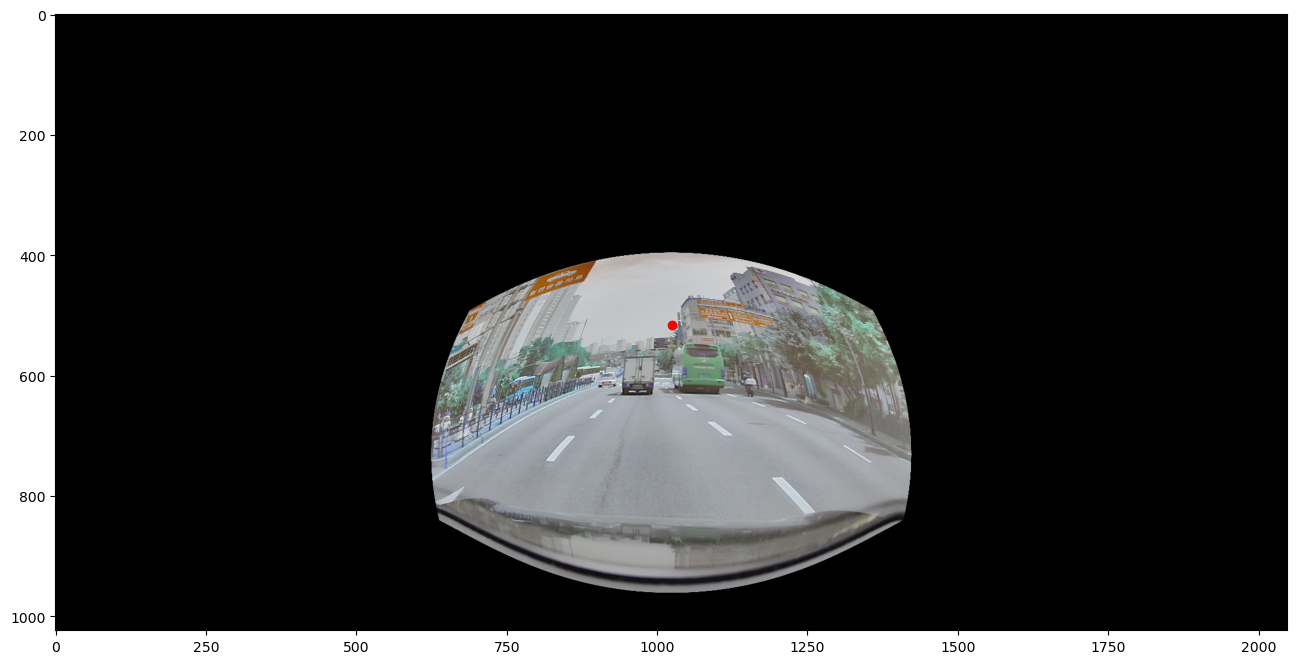

In [214]:
# 피셔 아이 왜곡 적용
fisheye_img = apply_fisheye_distortion(input_image_path)
fisheye_mask = apply_fisheye_distortion(mask_image_path, mask=True)

fig = plt.figure(figsize=(16,8))

plt.scatter(1024,516, c='red', marker='o')
plt.imshow(fisheye_img)
plt.show()

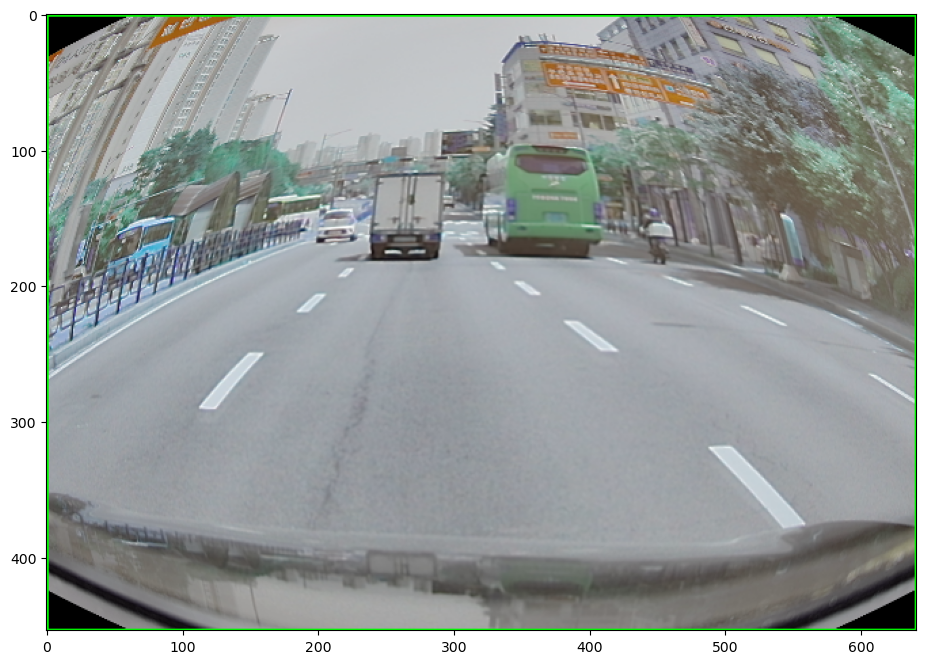

In [215]:
# Define the tone threshold (adjust as needed)
lower_tone = (1, 1, 1)  # Example lower tone threshold (BGR format)
upper_tone = (255, 255, 255)  # Example upper tone threshold (BGR format)
mask = cv2.inRange(fisheye_img, lower_tone, upper_tone)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to track the largest rectangle
largest_area = 0
largest_rectangle = None

# Iterate through the contours and find the largest rectangle
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = w * h
    if area > largest_area:
        largest_area = area
        largest_rectangle = (x, y, w, h)

# Draw the largest rectangle on the original image
if largest_rectangle is not None:
    x, y, w, h = largest_rectangle
    cv2.rectangle(fisheye_img, (x + int(w*0.1), y + int(h*0.1) ), (x + w - int(w*0.1) , y + h - int(h*0.1)), (0, 255, 0), 2)
    
    fig = plt.figure(figsize=(16,8))
    plt.imshow(fisheye_img[y + int(h*0.1) : y + h - int(h*0.1), x + int(w*0.1) : x + w - int(w*0.1)])
    plt.show()

In [ ]:
fish_seg_colored = np.zeros((fisheye_mask.shape[0], fisheye_mask.shape[1], 3), dtype=np.uint8)

for i, color in enumerate(palette):
    fish_seg_colored[fisheye_mask == i] = color

fish_seg_result = cv2.addWeighted(fisheye_img, 0.7, fish_seg_colored, 0.7, 0)

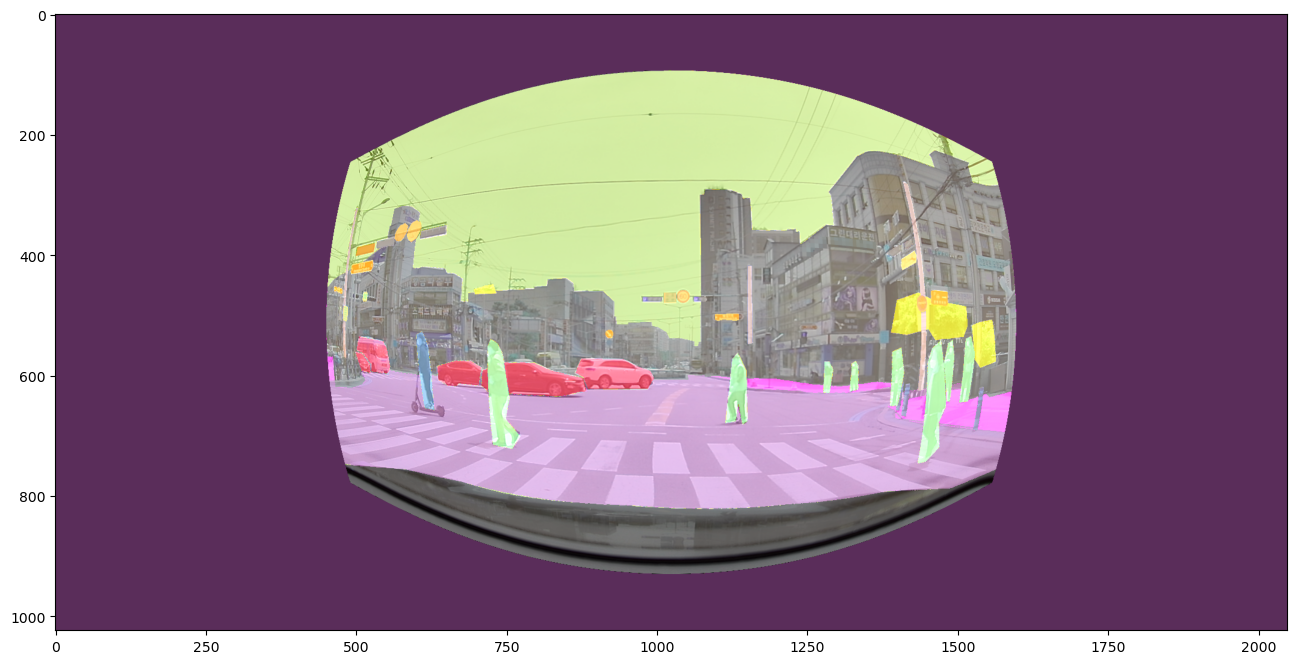

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.imshow(fish_seg_result)
plt.show()

In [114]:
import cv2
import numpy as np

# Load an image
image = cv2.imread('../data/train_source_image/TRAIN_SOURCE_0974.png')

# Define the distortion coefficients (k1, k2)
k1 = 0.001  # Positive value for barrel distortion
k2 = 0.001

# Define the camera matrix (this example uses a simple identity matrix)
camera_matrix = np.array([[1.0, 0.0, image.shape[1] / 2],
                           [0.0, 1.0, image.shape[0] / 2],
                           [0.0, 0.0, 1.0]])

# Apply distortion
distorted_image = cv2.undistort(image, camera_matrix, np.array([k1, k2]))

# Display the original and distorted images
# cv2.imshow('Original Image', image)
# cv2.imshow('Distorted Image', distorted_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


fig = plt.figure(figsize=(16,8))

plt.scatter(512,256, c='red', marker='o')
plt.imshow(distorted_image)
plt.show()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\undistort.dispatch.cpp:138: error: (-215:Assertion failed) distCoeffs.size() == Size(1, 4) || distCoeffs.size() == Size(4, 1) || distCoeffs.size() == Size(1, 5) || distCoeffs.size() == Size(5, 1) || distCoeffs.size() == Size(1, 8) || distCoeffs.size() == Size(8, 1) || distCoeffs.size() == Size(1, 12) || distCoeffs.size() == Size(12, 1) || distCoeffs.size() == Size(1, 14) || distCoeffs.size() == Size(14, 1) in function 'cv::initUndistortRectifyMap'
